In [1]:
import json
import gzip
import math
from matplotlib import pyplot as plt, ticker as mticker
import matplotlib
import seaborn as sns
import pandas as pd 

#sns.set()
#sns.set_style('whitegrid')


from collections import defaultdict

coarse_sigmoid = lambda x: int((1/(math.exp(-x)+1)) * 5)/5
  


def plot_rel_conf(predctions_file, label, marker):
    bin_cnt = defaultdict(lambda:0)
    bin_relevant_cnt = defaultdict(lambda:0)  
    data = json.load(gzip.open(predctions_file))
    for user in data:
        relevant_item = json.loads(user['test_actions'][0])["item_id"]
        for item in user['predictions']:
            item_id = item[0]
            conf_bin = coarse_sigmoid(item[1])
            bin_cnt[conf_bin] += 1
            is_relevant = int(item_id == relevant_item)
            bin_relevant_cnt[conf_bin] += is_relevant
    x = sorted(bin_relevant_cnt.keys())
    y = []
    for b in x:
        y.append(bin_relevant_cnt[b]/bin_cnt[b])
    plt.plot(x, y, label=label, marker=marker)

In [2]:
sigmoid = lambda x: (1/(math.exp(-x)+1))

def plot_rel_conf(predctions_file, label, marker):
    rank_cnt = defaultdict(lambda:0)
    rank_sum = defaultdict(lambda:0)
    rel_cnt = defaultdict(lambda:0)
    data = json.load(gzip.open(predctions_file))
    for user in data:
        relevant_item = json.loads(user['test_actions'][0])["item_id"]
        rank = 1
        for item in user['predictions']:
            item_id = item[0]
            prob = sigmoid(item[1])
            is_relevant = int(item_id == relevant_item)
            rel_cnt[rank] += is_relevant
            rank_cnt[rank] += 1
            rank_sum[rank] += prob
            rank += 1
            
    x = list(range(1, 50))
    y = []
    y_rel = []
    for r in x:
        y.append(rank_sum[r]/rank_cnt[r])
        y_rel.append(rel_cnt[r]/rank_cnt[r])
    #plt.plot(x, y, label=label, marker=marker)
    return x, y, y_rel

In [3]:
#plt.yscale('log')
x_gsas, y_gsas, y_rel_gsas = plot_rel_conf("results/BERT4rec.ml-1m/ml1m_bert4rec_ft_2023_01_19T13_31_40/predictions/DebSASRec-samples:64-t:1.0.json.gz", 'gSASRec (256 negatives, t=1.0)', marker='x')
x_sas, y_sas, y_rel_gsas = plot_rel_conf("results/BERT4rec.ml-1m/ml1m_bert4rec_ft_2023_01_19T13_31_40/predictions/DebSASRec-samples:1-t:0.0.json.gz", 'SASRec', marker='o')
#plt.plot([0,0.8], [0, 0.8], label='Ideal', linestyle = 'dashed')
#plt.xlabel('Rank')
#plt.ylabel('Average predicted probability')


In [4]:
models = ['SASRec', 'gSASRec (256 negatvies, t=0.1)']
df = pd.DataFrame([y_sas, y_gsas], columns=x_gsas, index=models).T
df.index.name='rank'

NameError: name 'y_rel_sas' is not defined

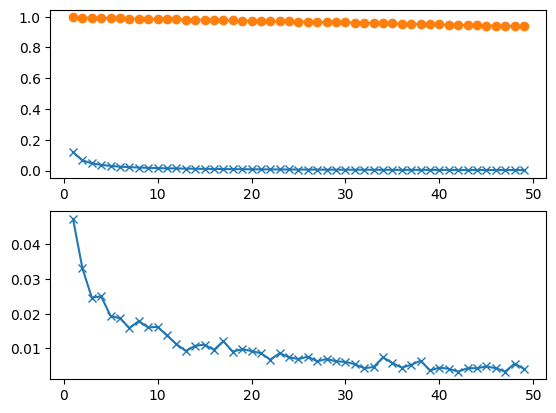

In [5]:
fig, ax = plt.subplots(2, 1)
ax1, ax2 = ax
ax1.plot(x_gsas, y_gsas, marker='x')
ax1.plot(x_sas, y_sas, marker='o')
ax2.plot(x_gsas, y_rel_gsas, marker='x')
ax2.plot(x_sas, y_rel_sas, marker='o')
for i in range(len(x_gsas)):
    x=x_gsas[i]
    sas_val = y_sas[i]
    ax1.annotate(f"{sas_val:.3f}", (x-0.4, sas_val* 0.6))
    gsas_val = y_gsas[i]
    ax1.annotate(f"{gsas_val:.3f}", (x+0.1, gsas_val * 1.1))

ax1.grid(True,which="both",ls="-",c='gray', alpha = 0.2)  
ax1.set_yscale('log', base=10)
ax1.set_yticks([0.01, 0.02,  0.04, 0.1, 0.2, 0.4, 1.0])
ax1.set_xticks(x_gsas)
ax1.set_xlim(0.5, 11)
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax1.set_ylabel('predicted probability')



NameError: name 'y_rel_sas' is not defined

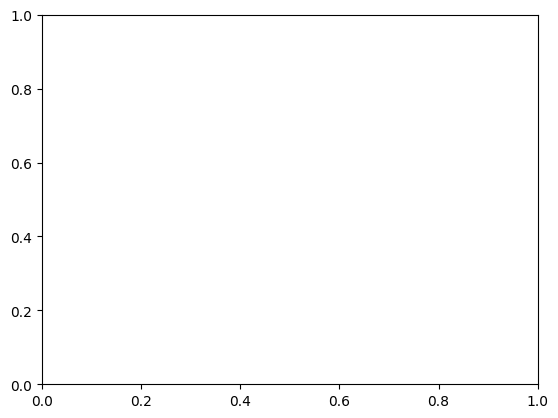

In [6]:
fig, ax = plt.subplots()
ax.scatter(y_rel_sas, y_sas, marker='x', label='SASRec')
ax.scatter(y_rel_gsas, y_gsas, marker='o',  label='gSASRec (256 negatvies, t=1.0)')
ax.set_yscale('log')
ax.set_xscale('log')
ax.plot([0, 0.1], [0, 0.1], linestyle='--', color='green', label='ideal (predicted=actual)')
ax.grid(True,which="both",ls="-",c='gray', alpha = 0.2)  
ax.set_yscale('log', base=10)
ax.set_yticks([0.005, 0.01, 0.02,  0.04, 0.1, 0.2, 0.4, 1.0])
ax.set_xticks([0.005, 0.01, 0.02,  0.04, 0.1])
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.set_xlabel('Actual Probability')
ax.set_ylabel('Predicted Probability')
ax.legend()

In [7]:
json.dumps([y_rel_sas, y_sas, y_rel_gsas, y_gsas])

NameError: name 'y_rel_sas' is not defined